# Picture Language by Calyst Scheme with Python

In [1]:
(python-exec
"
import cv2
import numpy as np
import IPython
"
)

## Define primitive painter

In [2]:
(python-exec
"
def image_painter(image_path):
  image = cv2.imread(image_path)
  def painter_func(frame):
    h = frame.shape[0]
    w = frame.shape[1]
    resized_image = cv2.resize(image, (w, h))
    frame[:,:,:] = resized_image
  return painter_func

def wave(frame):
  segments = (
    (0.000, 0.355, 0.154, 0.590),
    (0.154, 0.590, 0.302, 0.420),
    (0.302, 0.420, 0.354, 0.510),
    (0.354, 0.510, 0.245, 1.000),
    (0.419, 1.000, 0.497, 0.830),
    (0.497, 0.830, 0.575, 1.000),
    (0.748, 1.000, 0.605, 0.540),
    (0.605, 0.540, 1.000, 0.860),
    (1.000, 0.646, 0.748, 0.350),
    (0.748, 0.350, 0.582, 0.350),
    (0.582, 0.350, 0.640, 0.150),
    (0.640, 0.150, 0.575, 0.000),
    (0.419, 0.000, 0.354, 0.150),
    (0.354, 0.150, 0.411, 0.350),
    (0.411, 0.350, 0.285, 0.350),
    (0.285, 0.350, 0.154, 0.400),
    (0.154, 0.400, 0.000, 0.150),
  )
  h = frame.shape[0]
  w = frame.shape[1]
  frame.fill(255)
  for segment in segments:
    x0 = round(segment[0] * w)
    y0 = round(segment[1] * h)
    x1 = round(segment[2] * w)
    y1 = round(segment[3] * h)
    cv2.line(frame, (x0, y0), (x1, y1), (0, 0, 0), 1)
")

## Define operators

In [3]:
(python-exec
"
def beside(painter1, painter2):
  def painter_func(frame):
      h = frame.shape[0]
      w = frame.shape[1]
      w1 = w // 2
      w2 = w - w1
      subframe1 = np.ndarray((h, w1 ,3))
      subframe2 = np.ndarray((h, w2 ,3))
      painter1(subframe1)
      painter2(subframe2)
      frame[:, :w1, :] = subframe1[:,:,:]
      frame[:, w1:, :] = subframe2[:,:,:]
  return painter_func

def below(painter1, painter2):
  def painter_func(frame):
      h = frame.shape[0]
      w = frame.shape[1]
      h1 = h // 2
      h2 = h - h1
      subframe1 = np.ndarray((h1, w ,3))
      subframe2 = np.ndarray((h2, w ,3))
      painter1(subframe1)
      painter2(subframe2)
      frame[h1:, :, :] = subframe1[:,:,:]
      frame[:h1, :, :] = subframe2[:,:,:]
  return painter_func


def flip_vert(painter):
  def painter_func(frame):
    original_frame = np.ndarray(frame.shape)
    painter(original_frame)
    fliped_frame = np.flipud(original_frame)
    frame[:,:,:] = fliped_frame[:,:,:]
  return painter_func

def flip_horiz(painter):
  def painter_func(frame):
    original_frame = np.ndarray(frame.shape)
    painter(original_frame)
    fliped_frame = np.fliplr(original_frame)
    frame[:,:,:] = fliped_frame[:,:,:]
  return painter_func
"
)

; define alias
(define flip-vert flip_vert)
(define flip-horiz flip_horiz)

## Define paint to show a picture in Jupyter Notebook

In [4]:
(python-exec
"
def create_display_image(img):
    decoded_img = cv2.imencode('.jpg', img)[1]
    display_image = IPython.display.Image(data=decoded_img)
    return display_image

def paint(painter):
    frame = np.ndarray((512, 512, 3))
    painter(frame)
    return create_display_image(frame)
")

## Building picture language by Calysto Schme

In [5]:
(define rogers (image_painter "rogers.png"))
(define safie (image_painter "safie.png"))

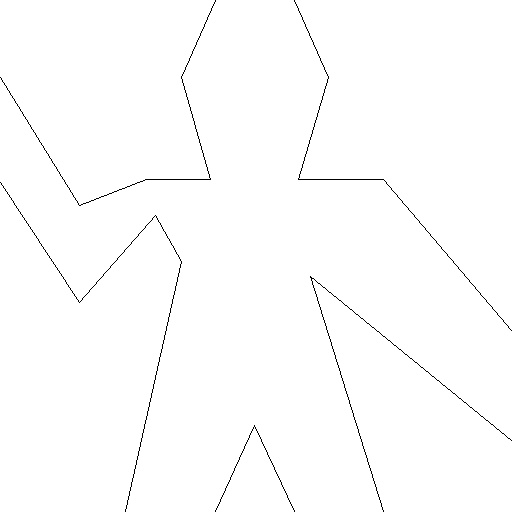

In [6]:
(paint wave)

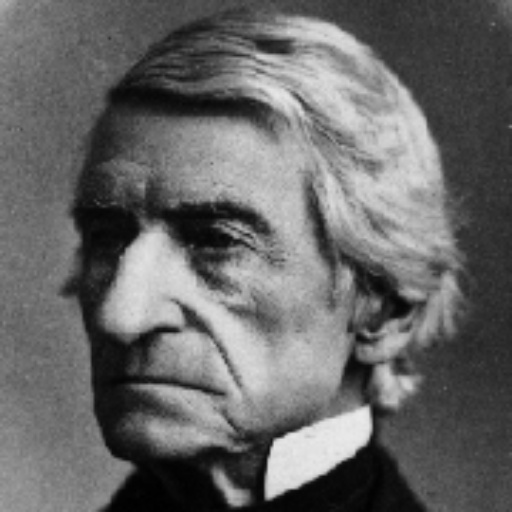

In [7]:
(paint rogers)

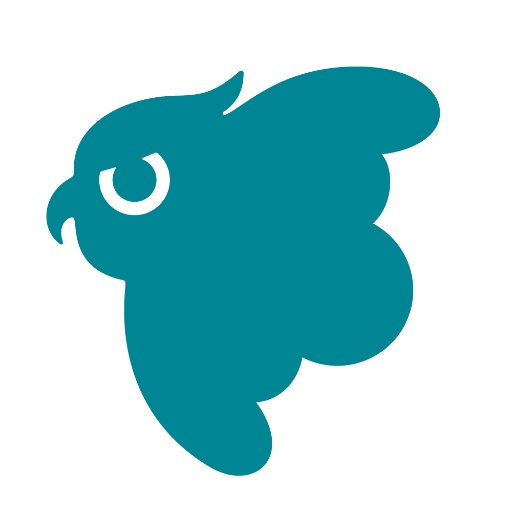

In [8]:
(paint safie)

In [9]:
(define wave2 (beside wave (flip-vert wave)))
(define wave4 (below wave2 wave2))

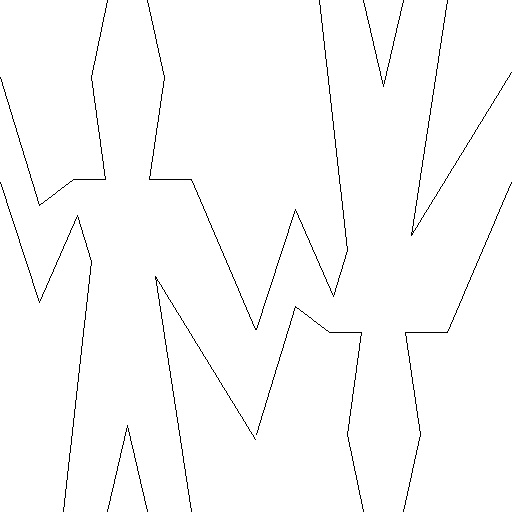

In [10]:
(paint wave2)

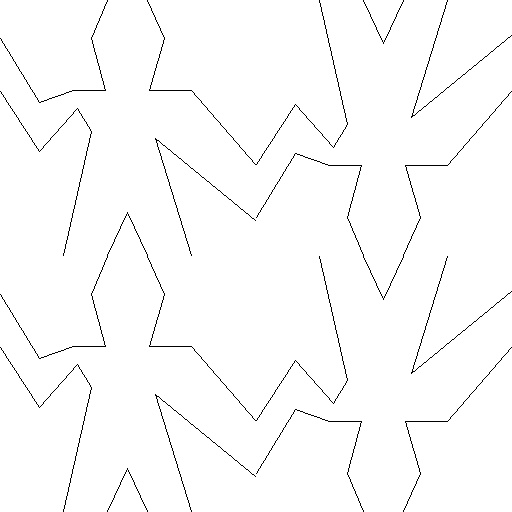

In [11]:
(paint wave4)

In [12]:
(define (right-split painter n)
  (if (= n 0)
      painter
      (let ((smaller (right-split painter (- n 1))))
        (beside painter (below smaller smaller)))))

(define (up-split painter n)
  (if (= n 0)
      painter
      (let ((smaller (up-split painter (- n 1))))
        (below painter (beside smaller smaller) ))))


(define (corner-split painter n)
  (if (= n 0)
      painter
      (let ((up (up-split painter (- n 1)))
            (right (right-split painter (- n 1))))
        (let ((top-left (beside up up))
              (bottom-right (below right right))
              (corner (corner-split painter (- n 1))))
          (beside (below painter top-left)
                  (below bottom-right corner))))))


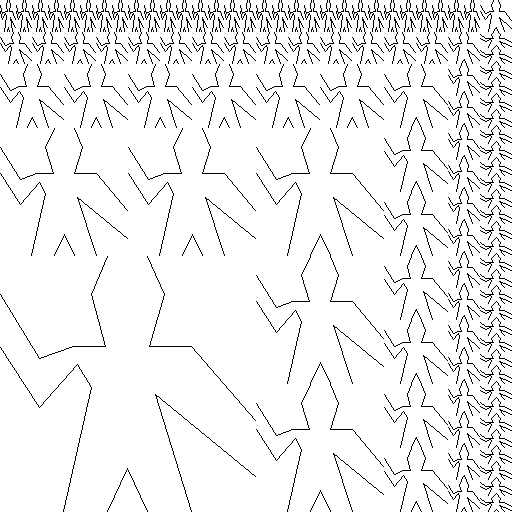

In [13]:
(paint (corner-split wave 4))

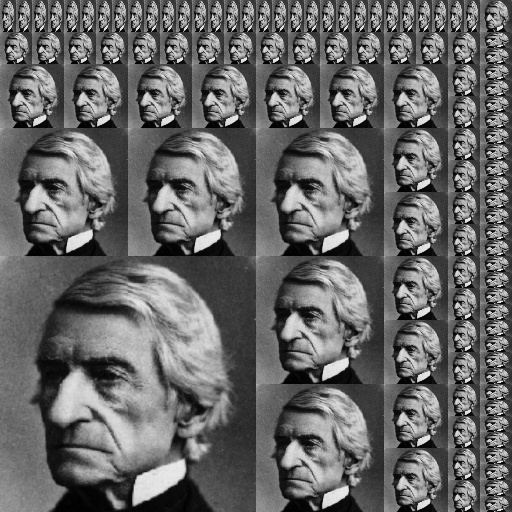

In [14]:
(paint (corner-split rogers 4))

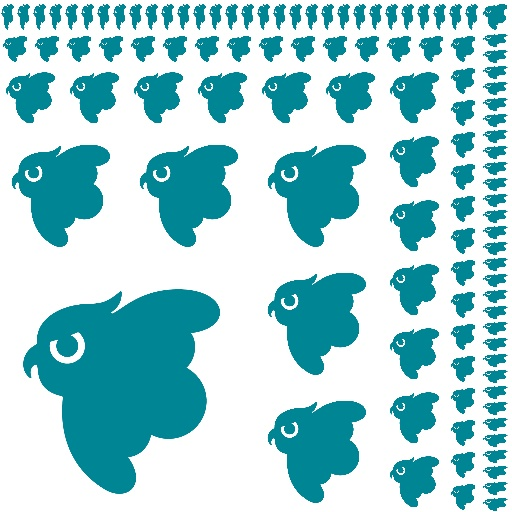

In [15]:
(paint (corner-split safie 4))